In [1]:
import pyspark
pyspark.__file__

'/home/spark_jhigaki_gcp/spark/spark-3.4.4-bin-hadoop3/python/pyspark/__init__.py'

In [2]:
from pyspark.sql import SparkSession


In [4]:
spark = SparkSession.builder.master("local[*]").appName('test').getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/21 20:57:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
!pwd

/home/spark_jhigaki_gcp


In [7]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2021-01.parquet


--2024-11-21 21:05:45--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2021-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 3.160.226.228, 3.160.226.85, 3.160.226.111, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|3.160.226.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308924937 (295M) [application/x-www-form-urlencoded]
Saving to: ‘fhvhv_tripdata_2021-01.parquet’

fhvhv_tripdata_2021 100%[===================>] 294.61M  46.8MB/s    in 6.8s    

2024-11-21 21:05:52 (43.4 MB/s) - ‘fhvhv_tripdata_2021-01.parquet’ saved [308924937/308924937]



In [8]:
!wc -l fhvhv_tripdata_2021-01.parquet

1006794 fhvhv_tripdata_2021-01.parquet


This is parquet / binary, so. DOn't think it's got 1M records only

In [9]:
df_fhvhv = spark.read.option('header', True).parquet('fhvhv_tripdata_2021-01.parquet')

In [12]:
df_fhvhv.show(20)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [11]:
df_fhvhv.head(20)

[Row(hvfhs_license_num='HV0003', dispatching_base_num='B02682', originating_base_num='B02682', request_datetime=datetime.datetime(2021, 1, 1, 0, 28, 9), on_scene_datetime=datetime.datetime(2021, 1, 1, 0, 31, 42), pickup_datetime=datetime.datetime(2021, 1, 1, 0, 33, 44), dropoff_datetime=datetime.datetime(2021, 1, 1, 0, 49, 7), PULocationID=230, DOLocationID=166, trip_miles=5.26, trip_time=923, base_passenger_fare=22.28, tolls=0.0, bcf=0.67, sales_tax=1.98, congestion_surcharge=2.75, airport_fee=None, tips=0.0, driver_pay=14.99, shared_request_flag='N', shared_match_flag='N', access_a_ride_flag=' ', wav_request_flag='N', wav_match_flag='N'),
 Row(hvfhs_license_num='HV0003', dispatching_base_num='B02682', originating_base_num='B02682', request_datetime=datetime.datetime(2021, 1, 1, 0, 45, 56), on_scene_datetime=datetime.datetime(2021, 1, 1, 0, 55, 19), pickup_datetime=datetime.datetime(2021, 1, 1, 0, 55, 19), dropoff_datetime=datetime.datetime(2021, 1, 1, 1, 18, 21), PULocationID=152, DO

In [13]:
df_fhvhv.schema

StructType([StructField('hvfhs_license_num', StringType(), True), StructField('dispatching_base_num', StringType(), True), StructField('originating_base_num', StringType(), True), StructField('request_datetime', TimestampNTZType(), True), StructField('on_scene_datetime', TimestampNTZType(), True), StructField('pickup_datetime', TimestampNTZType(), True), StructField('dropoff_datetime', TimestampNTZType(), True), StructField('PULocationID', LongType(), True), StructField('DOLocationID', LongType(), True), StructField('trip_miles', DoubleType(), True), StructField('trip_time', LongType(), True), StructField('base_passenger_fare', DoubleType(), True), StructField('tolls', DoubleType(), True), StructField('bcf', DoubleType(), True), StructField('sales_tax', DoubleType(), True), StructField('congestion_surcharge', DoubleType(), True), StructField('airport_fee', DoubleType(), True), StructField('tips', DoubleType(), True), StructField('driver_pay', DoubleType(), True), StructField('shared_re

## Override Schema
Make long - Int, TimestampNTZType - TimestampType



In [ ]:
from pyspark.sql import types

In [24]:
schema = types.StructType([
types.StructField('hvfhs_license_num', types.StringType(), True), 
types.StructField('dispatching_base_num', types.StringType(), True), 
types.StructField('originating_base_num', types.StringType(), True), 
types.StructField('request_datetime', types.TimestampType(), True), 
types.StructField('on_scene_datetime', types.TimestampType(), True), 
types.StructField('pickup_datetime', types.TimestampType(), True), 
types.StructField('dropoff_datetime', types.TimestampType(), True), 
types.StructField('DOLocationID', types.LongType(), True), 
types.StructField('PULocationID', types.LongType(), True), 
types.StructField('trip_miles', types.DoubleType(), True), 
types.StructField('trip_time', types.LongType(), True), 
types.StructField('base_passenger_fare', types.DoubleType(), True), 
types.StructField('tolls', types.DoubleType(), True), 
types.StructField('bcf', types.DoubleType(), True), 
types.StructField('sales_tax', types.DoubleType(), True), 
types.StructField('congestion_surcharge', types.DoubleType(), True), 
types.StructField('airport_fee', types.DoubleType(), True), 
types.StructField('tips', types.DoubleType(), True), 
types.StructField('driver_pay', types.DoubleType(), True), 
types.StructField('shared_request_flag', types.StringType(), True), 
types.StructField('shared_match_flag', types.StringType(), True), 
types.StructField('access_a_ride_flag', types.StringType(), True), 
types.StructField('wav_request_flag', types.StringType(), True), 
types.StructField('wav_match_flag', types.StringType(), True)])

In [25]:
df_fhvhv2 = spark.read.option('header', True).schema(schema).parquet('fhvhv_tripdata_2021-01.parquet')

In [19]:
df_fhvhv2.schema

StructType([StructField('hvfhs_license_num', StringType(), True), StructField('dispatching_base_num', StringType(), True), StructField('originating_base_num', StringType(), True), StructField('request_datetime', TimestampType(), True), StructField('on_scene_datetime', TimestampType(), True), StructField('pickup_datetime', TimestampType(), True), StructField('dropoff_datetime', TimestampType(), True), StructField('DOLocationID', IntegerType(), True), StructField('PULocationID', IntegerType(), True), StructField('trip_miles', DoubleType(), True), StructField('trip_time', DoubleType(), True), StructField('base_passenger_fare', DoubleType(), True), StructField('tolls', DoubleType(), True), StructField('bcf', DoubleType(), True), StructField('sales_tax', DoubleType(), True), StructField('congestion_surcharge', DoubleType(), True), StructField('airport_fee', DoubleType(), True), StructField('tips', DoubleType(), True), StructField('driver_pay', DoubleType(), True), StructField('shared_reques

In [26]:
df_fhvhv2.show(20)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|DOLocationID|PULocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [ ]:
df_fhvhv2.head(20)

Wasnt necessary to override the types.

Since Parquet already has column types as part of its metadata 

Specifying IntegerType for a column that has Int64 type at the parquet file, it threw an error at the moment of execution (`df.hshow`)

We're doing a single file (even if we had a multiple executor cluster) only one would be tasked
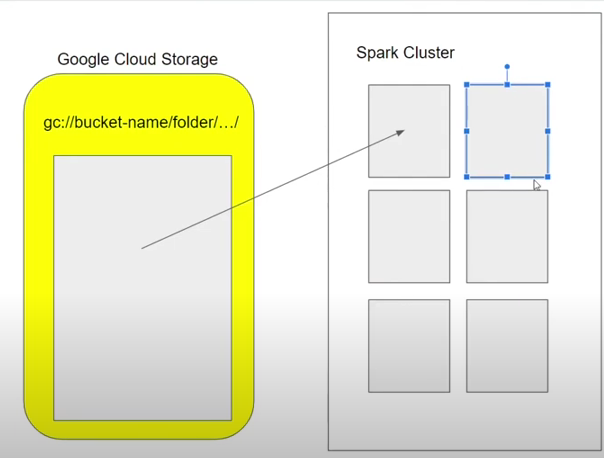


In [28]:
df_fhvhv2.count()

11908468

But, I'm curious about how many executors I have

In [29]:
from pyspark import SparkContext
from pyspark import SparkConf

In [38]:
spark.sparkContext._conf.getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.sql.warehouse.dir', 'file:/home/spark_jhigaki_gcp/spark-warehouse'),
 ('spark.app.name', 'test

In [32]:
sc =  SparkContext("local[*]", "test").getOrCreate()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=test, master=local[*]) created by getOrCreate at /tmp/ipykernel_1084/4090916776.py:1 

# I don't know why I only have #1 executor.
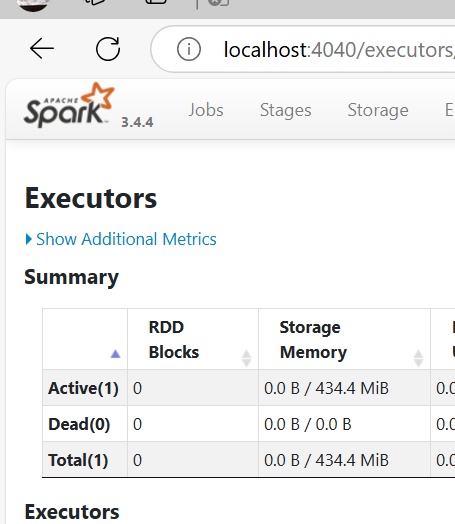

Pending to test, how to set multiple executors. VM Instance has 2
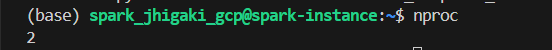

My dev container has 16
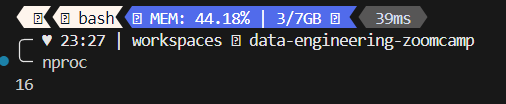

My windows machine 16
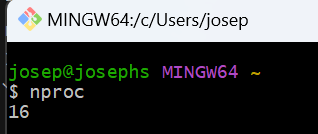


